### Boston 주택 가격 예측(Linear Regression, scikit-learn 사용) :선형회귀모델

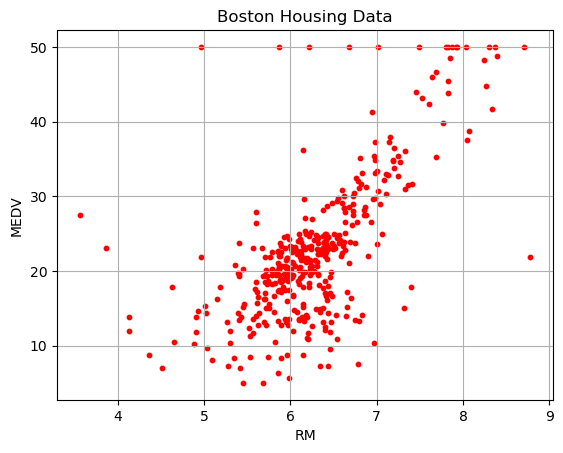

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA : 탐색적 데이터 분석, Exploratory Data Anaysis
df = pd.read_csv('boston_train.csv')
df.corr()  #상관계수  ,RM(방의 갯수) , MEDV(주택가격)

# 시각화
plt.scatter(df['RM'],df['MEDV'],c='r',s=10)  # 산점도
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Boston Housing Data')
plt.grid()
plt.show()
df

[[9.02315014]]
[-33.99803804]


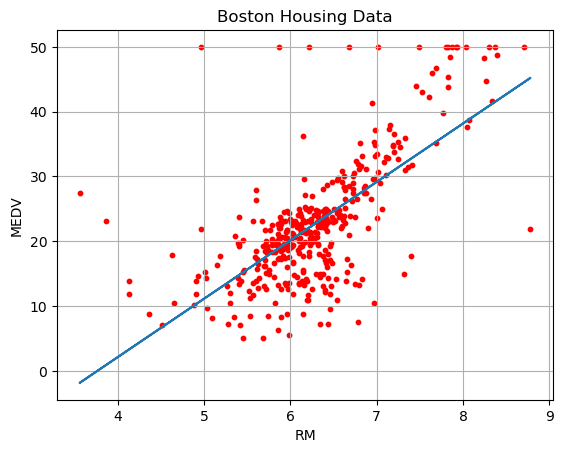

In [20]:
# 단항(1차원, 피쳐가 1개) 회귀 모델
from sklearn.linear_model import LinearRegression

# 클래스 인스턴스를 생성
lr = LinearRegression()

# 입출력 데이터를 설정 : 2차원으로 배열,데이터프레임으로 입력
x = df['RM'].values.reshape(-1,1)     # (400,) --> (400,1),2차원, -1은 자동 계산
y = df['MEDV'].values.reshape(-1,1)   # (400,) --> (400,1),2차원, -1은 자동 계산

# 학습 : x,y를 입력
lr.fit(x,y)

# 회귀 계수: 가중치
print(lr.coef_)       # weight : [[9.02315014]]
print(lr.intercept_)  # bias :   [-33.99803804]
                      # H(x) = 9.02315014*x - 33.99803804

# 예측 : x값만 입력
y_pred = lr.predict(x)

# 결과 시각화
# 원본
plt.scatter(x,y,c='r',s=10)  # 산점도
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Boston Housing Data')
plt.grid()

# 예측 함수(직선 그래프) : H(x) = 9.02315014*x - 33.99803804
plt.plot(x,y_pred)
plt.show()

In [25]:
# 정확도 측정 , RMSE, 상대 지표(값이 작을 수록 정확도가 높다)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred)   # 평균 제곱 오차
rmse = np.sqrt(mse)                  # 평균 제곱근오차
print('RMSE:', rmse)                 # RMSE: 6.964958263761021

# R2(R-squared), 결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                           절대 지표
# https://m.blog.naver.com/tlrror9496/222055889079
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2_score:',r2)   #  0.46928062004385107

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


[[-1.59072134e-01  4.08534780e-02 -1.18682966e-01 -2.14042031e+01
   6.06293561e+00 -4.40157092e-02 -1.81025024e+00  4.29464930e-04
  -1.08359905e+00]]
[27.68496713]


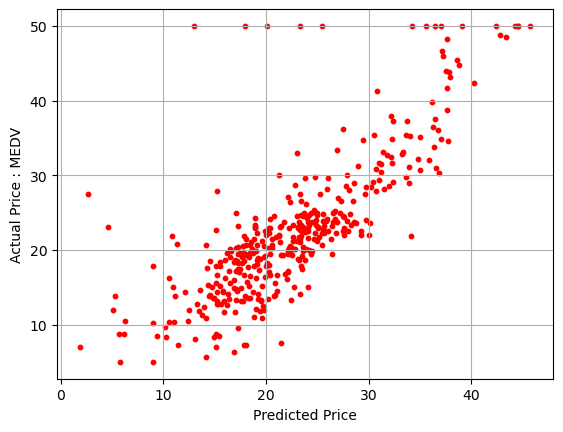

In [38]:
# 다항(다차원, 피처가 2개 이상) 회귀 모델, scikit-learn 사용
x = df.iloc[:,:-1]        # 마지막 컬럼을 제외, 9개 컬럼을 피쳐로 사용, (400,9),2차원
y = df.iloc[:,-1:]        # 마지막 컬럼만 추출, (400,1), 2차원
# print(x.shape,y.shape)  # x: (400, 9) , y: (400, 1)

# 클래스 인스턴스를 생성
lr = LinearRegression()

# 학습 : x,y를 입력
lr.fit(x,y)

# 회귀 계수: 가중치
print(lr.coef_)       # weight : (9,1) , 9개 생성
print(lr.intercept_)  # bias :   [27.68496713]
                      # H(x1,x2,....,x9) = w1*x1 + w2*x2 + ,......,w9*x9 + 27.68496713

# 예측 : x값만 입력
y_pred = lr.predict(x)

# 결과 시각화 :  x축을 예측값, y축을 실제값
plt.scatter(y_pred,y, c = 'r', s = 10)
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price : MEDV')  
plt.grid()
plt.show()

In [39]:
# 정확도 측정 , RMSE, 상대 지표(값이 작을 수록 정확도가 높다)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred)   # 평균 제곱 오차
rmse = np.sqrt(mse)                  # 평균 제곱근오차
print('RMSE:', rmse)                 # RMSE: 6.964958263761021  --> 5.753475905312981

# R2(R-squared), 결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                           절대 지표
# https://m.blog.naver.com/tlrror9496/222055889079
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2_score:',r2)   #  0.46928062004385107  --> 0.6378499850549992

# 결과 : 단항 회귀 모델보다 다항 회귀 모델의 성능이 우수하다

RMSE: 5.753475905312981
r2_score: 0.6378499850549992


### RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=0)

# 다항 회귀 모델
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# 학습
rf.fit(x,y)

# 예측 
y_pred = rf.predict(x)

# 정확도 측정, 평가 지표
mse = mean_squared_error(y,y_pred)   # 평균 제곱 오차
rmse = np.sqrt(mse)                  # 평균 제곱근오차
print('RMSE:', rmse)                 # RMSE: 1.7417950534219007

r2 = r2_score(y,y_pred)
print('r2_score:',r2)   #  0.9668088717202007

# LinearRegression모델 보다 RandomForestRegressor 모델의 성능이 우수하다

C:\Users\storm\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 1.7417950534219007
r2_score: 0.9668088717202007
